# TITANIC SURVIVAL PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
Titanic_df = pd.read_csv("C:/DA Project Details/Titanic-Dataset.csv")

In [3]:
Titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Exploratory Data Analysis (EDA)

In [4]:
Titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#Checking for missing values
Titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
def Missing_val_treat(df):
    for column in df.columns:
        if df[column].dtype=='object':
            df[column]=df[column].fillna(df[column].mode()[0])
        elif df[column].dtype=='int' or df[column].dtype=='float':
            df[column] = df[column].fillna(df[column].mean())
    return df

In [7]:
Missing_val_treat(Titanic_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [8]:
Titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
#changing the data type of Age column from float to int
Titanic_df.Age = Titanic_df.Age.astype('int')

In [10]:
Titanic_df.Age.nunique()

71

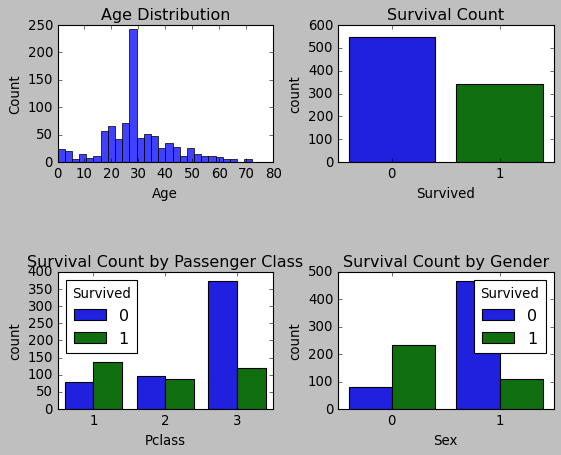

In [30]:
# Visualize the distribution of numerical features

plt.subplots_adjust(hspace=0.8 , wspace=0.3)


plt.subplot(2,2,1)
sns.histplot(Titanic_df['Age'])
plt.title('Age Distribution')

# Visualize survival rate by different features
plt.subplot(2,2,2)
sns.countplot(x='Survived', data=Titanic_df)
plt.title('Survival Count')

plt.subplot(2,2,3)
sns.countplot(x='Pclass', hue='Survived', data=Titanic_df)
plt.title('Survival Count by Passenger Class')

plt.subplot(2,2,4)
sns.countplot(x='Sex', hue='Survived', data=Titanic_df)
plt.title('Survival Count by Gender')
plt.style.use("classic")
plt.show()

In [12]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [13]:
Titanic_df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

## Data Preprocessing

In [14]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
#Droping un necessary columns
Titanic_df.drop(columns=['Name' , 'Ticket' , 'Cabin'] , inplace=True)

In [16]:
#Encoding catagorical variable
label_encoder = LabelEncoder()
Titanic_df["Sex"] = label_encoder.fit_transform(Titanic_df["Sex"]) # therefore 1 refers to male and 0 to female
Titanic_df["Embarked"] = label_encoder.fit_transform(Titanic_df["Embarked"]) #  0 = C , 1= Q , 2 =S 

In [17]:
Titanic_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7.2500,2
1,2,1,1,0,38,1,0,71.2833,0
2,3,1,3,0,26,0,0,7.9250,2
3,4,1,1,0,35,1,0,53.1000,2
4,5,0,3,1,35,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27,0,0,13.0000,2
887,888,1,1,0,19,0,0,30.0000,2
888,889,0,3,0,29,1,2,23.4500,2
889,890,1,1,1,26,0,0,30.0000,0


In [18]:
# Separating features and target variable

X = Titanic_df[Titanic_df.columns.difference(['Survived'])]
y = Titanic_df["Survived"]

In [19]:
# splitting the data in training and testing sets 

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state= 10)

In [20]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [21]:
#scaling the Features

Sc = StandardScaler()
X_train = Sc.fit_transform(X_train)
X_test = Sc.fit_transform(X_test)

### Bulding the model

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix

In [23]:
Dt = DecisionTreeClassifier()

param= { 'criterion' : ["gini", "entropy"],
    'max_depth':[4,5,6,8] ,
    'min_samples_split': [2,4,6,8]}

In [24]:
Grid_cv = GridSearchCV( Dt , param_grid= param , cv=10 )

In [25]:
Grid_cv.fit(X_train , y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 8],
                         'min_samples_split': [2, 4, 6, 8]})

In [26]:
#Checking for best score & param
print('Best Param:' , Grid_cv.best_params_)
print('Best Score:' , Grid_cv.best_score_)

Best Param: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}
Best Score: 0.799197965571205


In [27]:
#Evaluating best model on test data 
Best_est = Grid_cv.best_estimator_
y_pred = Best_est.predict(X_test)

In [28]:
print(f'Accuracy Score :{accuracy_score(y_test , y_pred)}', '\n\n')
print('Classification Report :')
print(classification_report(y_test , y_pred))

Accuracy Score :0.8435754189944135 


Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       117
           1       0.78      0.76      0.77        62

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



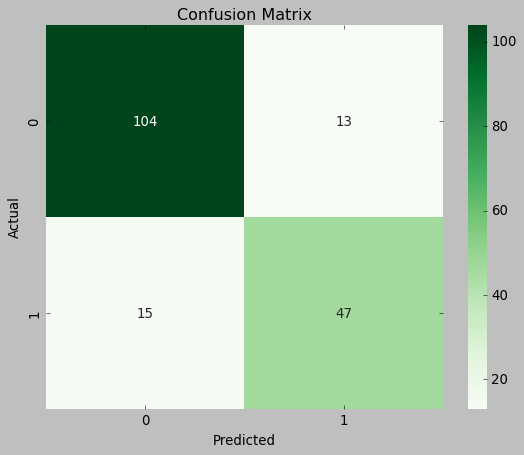

In [29]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens') #annot=True numerical valuesto each cell of heatmap 'd' - decimal numbers
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

    ##the confusion matrix represents:
        1.True Negative : where the actual value is '0' and the model also predicted '0' = 101 
        2.False Positive : where the actual value is '0' but the model predicted it as '1' = 16
        3.False Negative : Where the actual value was '1' but the model predicted as '0' = 17
        4.True Positive : Where the actual value was '1' but the model predicted as '1' = 45